<div style="background:#222222; color:#ffffff; padding:20px">
    <h2 align="center"> Deep Learning Fundamentals</h2>
    <h2 align="center" style="color:#01ff84">Regression: From scratch</h2>
<div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from typing import Callable

### Generate syntatic data
Genrate noisy data points from a linear function:

$$y = 2x + 10$$

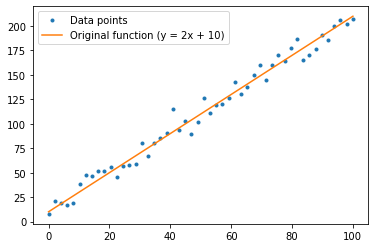

In [11]:
x = np.linspace(start=0, stop=100, num=50)
y = (x * 2 + 10) + np.random.normal(scale=10, size=50)

x = x.reshape(50,-1)
y = y.reshape(50,-1)

p = x @ weights_true + bias_true

plt.plot(x, y, '.', label="Data points")
plt.plot(x, p, '-', label='Original function (y = 2x + 10)')
plt.legend();

### Basic prediction function: Linear

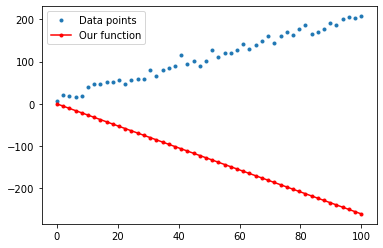

In [17]:
# Let's initialize our predictions

in_dim  = 1
out_dim = 1

class Linear:
    def __init__(self, input_dim, num_hidden=out_dim):
        # The initialization is important to properly deal with different
        # input sizes (otherwise gradients quickly go to 0).
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias    = np.zeros(1)

    def __call__(self, x):
        return x @ self.weights + self.bias

linear = Linear(in_dim)
p = linear(x)

plt.plot(x, y, '.', label='Data points')
plt.plot(x, p, color='r', marker='.', label='Our function')
plt.legend();

### Basic loss function: MSE


In [18]:
# How wrong are these initial predictions, exactly?
# It's up to us, and our definition is called the loss function.
# Let's use Mean Squared Error (MSE) as our loss function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_true - y_pred) ** 2).mean()

loss = MSE()    
print(f'Our initial loss is {loss(y, p)}')

Our initial loss is 76108.95154737862


### Add back propagation -> `backward()` method

In [19]:
# Let's use gradient descent to learn the weights and bias that minimizes the loss function.
# For this, we need the gradient of the loss function and the gradients of the linear function.

class MSE:
    def __call__(self, y_pred, y_true):
        self.y_pred = y_pred
        self.y_true = y_true
        return ((y_pred - y_true) ** 2).mean()

    def backward(self):
        n = self.y_true.shape[0]
        self.gradient = 2. * (self.y_pred - self.y_true) / n
        # print('MSE backward', self.y_pred.shape, self.y_true.shape, self.gradient.shape)
        return self.gradient


class Linear:
    def __init__(self, input_dim: int, num_hidden: int = 1):
        self.weights = np.random.randn(input_dim, num_hidden) * np.sqrt(2. / input_dim)
        self.bias = np.zeros((1))
        # bound = np.sqrt(6 / (input_dim + num_hidden))
        # self.weights = np.random.uniform(-bound, bound, size=(input_dim, num_hidden))
        # self.bias = np.random.uniform(-bound, bound, size=(1,))
  
    def __call__(self, x):
        self.x = x
        output = x @ self.weights + self.bias
        # print('Linear forward', x.shape, self.weights.shape, output.shape)
        return output

    def backward(self, gradient):
        # y = w*x + b
        # dy/dx = w
        # dy/dw = x
        # dy/db = 1
        # print('Linear backward', gradient.shape, self.x.shape, self.weights.shape, self.bias.shape)
        self.weights_gradient = self.x.T @ gradient
        self.bias_gradient = gradient.sum()
        self.x_gradient = gradient @ self.weights.T
        return self.x_gradient
    
    def update(self, lr):
        self.weights = self.weights - lr * self.weights_gradient
        self.bias = self.bias - lr * self.bias_gradient

In [20]:
# Take one step forward and one step backward to make sure nothing breaks, and that the loss decreases.
loss = MSE()
linear = Linear(in_dim)

p = linear(x)
print(loss(p, y))
loss_gradient = loss.backward()
linear.backward(loss_gradient)
linear.update(lr=0.1)

p = linear(x)
print(loss(p, y))

13766.79516729516
6182030197.437536


### Train using gradient descent!

Epoch 0, loss 42861.46,	 weight [[0.98570811]], bias [0.03627989], 
Epoch 1, loss 4657.08,	 weight [[1.76897624]], bias [0.04855383], 
Epoch 2, loss 587.34,	 weight [[2.02461452]], bias [0.05299263], 
Epoch 3, loss 153.81,	 weight [[2.10804386]], bias [0.05487417], 
Epoch 4, loss 107.62,	 weight [[2.13526727]], bias [0.05592103], 


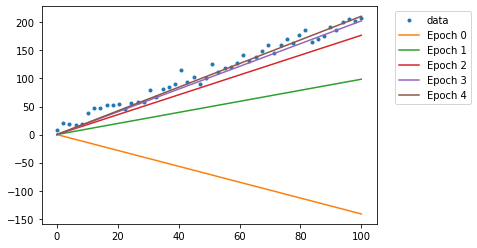

In [21]:
plt.plot(x, y, '.', label='data')

loss = MSE()
linear = Linear(in_dim)

num_epochs = 5
lr = 0.0001

for epoch in range(num_epochs):
    
    pred = linear(x)                     # 1) FOWARD (linear)
    loss_value = loss(pred, y)           # 1) FOWARD (loss)
    gradient_from_loss = loss.backward() # 2) BACKWARD (get loss grad)
    linear.backward(gradient_from_loss)  # 2) BACKWARD (get linear grad)
    linear.update(lr)                    # 3) UPDATE WEIGHTS (linar weight and bias)
    
    # Print and plot
    print(f'Epoch {epoch}, loss {loss_value:.2f},\t weight {linear.weights}, bias {linear.bias}, ')
    plt.plot(x, pred, label=f'Epoch {epoch}')

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");

# <center> 2-dimensional inputs work, too

In [22]:
def plot_3d(x, y, y_pred=None):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], y, label='underlying function')
    if y_pred is not None:
        ax.scatter(x[:, 0], x[:, 1], y_pred, label='our function')
    plt.legend()

### Syntatic data 2D

x: (100, 2), weights: (2, 1), bias: (1,), y: (100, 1)


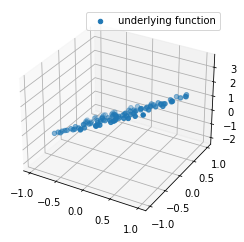

In [23]:
# What about 2-dimensional x?

# y = w * x + b
# y = w_0 * x_0 + w_1 * x_1 + b
# y = w@x + b

n = 100
d = 2
x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[2, -1], ]).T
bias_true    = np.array([0.5])
y_true = x @ weights_true + bias_true

print(f"x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}")
plot_3d(x, y_true)

0.9930253449268566


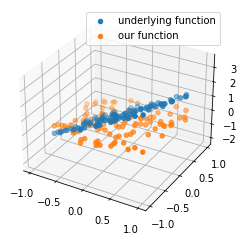

In [24]:
loss   = MSE()
linear = Linear(2)
y_pred = linear(x)
print(loss(y_pred, y_true))
fig = plot_3d(x, y_true, y_pred)

Epoch 0, loss 0.99
Epoch 1, loss 0.80
Epoch 2, loss 0.66
Epoch 3, loss 0.55
Epoch 4, loss 0.46
Epoch 5, loss 0.39
Epoch 6, loss 0.33
Epoch 7, loss 0.29
Epoch 8, loss 0.25
Epoch 9, loss 0.22
Epoch 10, loss 0.19
Epoch 11, loss 0.16
Epoch 12, loss 0.14
Epoch 13, loss 0.12
Epoch 14, loss 0.11
Epoch 15, loss 0.10
Epoch 16, loss 0.08
Epoch 17, loss 0.07
Epoch 18, loss 0.06
Epoch 19, loss 0.06


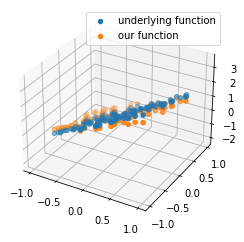

In [25]:
def fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    for epoch in range(num_epochs):
        y_pred = model(x)
        loss_value = loss(y_pred, y)
        print(f'Epoch {epoch}, loss {loss_value:.2f}')
        gradient_from_loss = loss.backward()
        model.backward(gradient_from_loss)
        model.update(lr)

fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=20)
plot_3d(x, y_true, linear(x))

## Basic regression with a Multi-layer Perceptron

So, we now have a way to automatically fit a linear function to N-dimensional data.

How can this be made to work for non-linear data?

x: (200, 2), weights: (2, 1), bias: (1,), y: (200, 1)


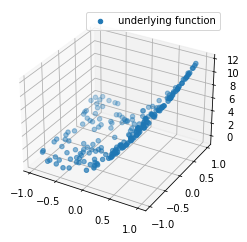

In [26]:
# Make non-linear data

n = 200
d = 2

x = np.random.uniform(-1, 1, (n, d))
weights_true = np.array([[5, 1],]).T
bias_true = np.array([1])
y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true

print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

plot_3d(x, y_true)

Epoch 0, loss 26.94
Epoch 1, loss 19.93
Epoch 2, loss 15.21
Epoch 3, loss 11.99
Epoch 4, loss 9.75
Epoch 5, loss 8.16
Epoch 6, loss 7.00
Epoch 7, loss 6.15
Epoch 8, loss 5.50
Epoch 9, loss 5.00
Epoch 10, loss 4.60
Epoch 11, loss 4.29
Epoch 12, loss 4.03
Epoch 13, loss 3.81
Epoch 14, loss 3.64
Epoch 15, loss 3.49
Epoch 16, loss 3.36
Epoch 17, loss 3.25
Epoch 18, loss 3.16
Epoch 19, loss 3.09
Epoch 20, loss 3.02
Epoch 21, loss 2.96
Epoch 22, loss 2.92
Epoch 23, loss 2.87
Epoch 24, loss 2.84
Epoch 25, loss 2.81
Epoch 26, loss 2.78
Epoch 27, loss 2.76
Epoch 28, loss 2.74
Epoch 29, loss 2.72
Epoch 30, loss 2.71
Epoch 31, loss 2.70
Epoch 32, loss 2.69
Epoch 33, loss 2.68
Epoch 34, loss 2.67
Epoch 35, loss 2.66
Epoch 36, loss 2.66
Epoch 37, loss 2.65
Epoch 38, loss 2.65
Epoch 39, loss 2.65


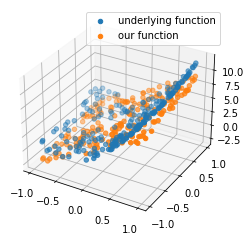

In [27]:
# We can train just fine, but the final loss will remain high, as our linear function is incapable
# of representing the data.

loss = MSE()
linear = Linear(d)
fit(x, y_true, model=linear, loss=loss, lr=0.1, num_epochs=40)
plot_3d(x, y_true, linear(x))

### Add non-linearity: ReLU

In [28]:
# In order to learn non-linear functions, we need non-linearities in our model.

class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = np.clip(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
        # import pdb; pdb.set_trace()  # By the way, this is how you can debug
        self.input_gradient = (self.input_ > 0) * output_gradient
        return self.input_gradient


relu = Relu()
input_ = np.expand_dims(np.array([1, 0.5, 0, -0.5, -1]), -1)
print(relu(input_))
print(relu.backward(input_))

[[1. ]
 [0.5]
 [0. ]
 [0. ]
 [0. ]]
[[ 1. ]
 [ 0.5]
 [ 0. ]
 [-0. ]
 [-0. ]]


### Train our new non-linear model

Initial loss: 27.83


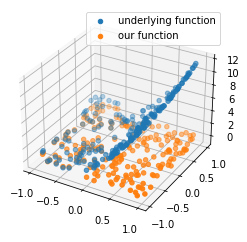

In [29]:
class Model:
    def __init__(self, input_dim, num_hidden):
        self.linear1 = Linear(input_dim, num_hidden)
        self.relu = Relu()
        self.linear2 = Linear(num_hidden, 1)
  
    def __call__(self, x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2
  
    def backward(self, output_gradient):
        linear2_gradient = self.linear2.backward(output_gradient)
        relu_gradient    = self.relu.backward(linear2_gradient)
        linear1_gradient = self.linear1.backward(relu_gradient)
        # print('Model backward', linear2_gradient.shape, relu_gradient.shape, linear1_gradient.shape)
        # import pdb; pdb.set_trace()
        return linear1_gradient

    def update(self, lr):
        self.linear2.update(lr)
        self.linear1.update(lr)

loss = MSE()
model = Model(d, 10)
y_pred = model(x)
loss_value = loss(y_pred, y_true)
loss_gradient = loss.backward()
print(f"Initial loss: {loss_value:.2f}")
model.backward(loss_gradient)
plot_3d(x, y_true, y_pred)

In [30]:
# Test just one forward and backward step
loss = MSE()
model = Model(d, 10)

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)
loss_gradient = loss.backward()
model.backward(loss_gradient)
model.update(0.1)

y_pred = model(x)
loss_value = loss(y_pred, y_true)
print(loss_value)

29.80518719649257
15.952313300153866


Epoch 0, loss 15.95
Epoch 1, loss 6.57
Epoch 2, loss 12.69
Epoch 3, loss 6.10
Epoch 4, loss 14.30
Epoch 5, loss 2.89
Epoch 6, loss 2.29
Epoch 7, loss 2.16
Epoch 8, loss 2.10
Epoch 9, loss 2.25
Epoch 10, loss 2.53
Epoch 11, loss 3.81
Epoch 12, loss 4.00
Epoch 13, loss 6.92
Epoch 14, loss 2.53
Epoch 15, loss 2.80
Epoch 16, loss 1.66
Epoch 17, loss 1.70
Epoch 18, loss 1.49
Epoch 19, loss 1.50
Epoch 20, loss 1.30
Epoch 21, loss 1.30
Epoch 22, loss 1.13
Epoch 23, loss 1.12
Epoch 24, loss 1.00
Epoch 25, loss 0.99
Epoch 26, loss 0.89
Epoch 27, loss 0.89
Epoch 28, loss 0.80
Epoch 29, loss 0.80


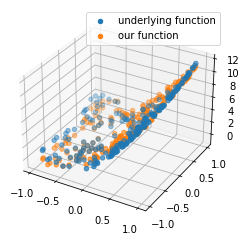

In [31]:
fit(x, y_true, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x))

<div style="background:#EE4C2C; padding:20px">
    <h1 align="center"> Same thing, in PyTorch</h1>
    <img height="50" width="50" src="https://simpleicons.org/icons/pytorch.svg"/>
<div>

### Create 2 layer model

Initial loss: 25.05


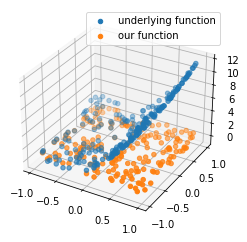

In [32]:
import torch
import torch.nn as nn


class TorchModel(nn.Module):
    def __init__(self, input_dim, num_hidden):
        super().__init__()
        self.linear1 = nn.Linear(input_dim, num_hidden)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(num_hidden, 1)
  
    def forward(self, x):
        l1 = self.linear1(x)
        r = self.relu(l1)
        l2 = self.linear2(r)
        return l2


loss = nn.MSELoss()
model = TorchModel(d, 10)
x_tensor = torch.tensor(x).float()
y_true_tensor = torch.tensor(y_true).float()
y_pred_tensor = model(x_tensor)
loss_value = loss(y_pred_tensor, y_true_tensor)
print(f"Initial loss: {loss_value.item():.2f}")
plot_3d(x_tensor, y_true_tensor, model(x_tensor).detach())

### Now we run the training loop

Epoch 0, loss 25.05
Epoch 1, loss 17.76
Epoch 2, loss 12.12
Epoch 3, loss 8.31
Epoch 4, loss 5.75
Epoch 5, loss 4.04
Epoch 6, loss 2.92
Epoch 7, loss 2.21
Epoch 8, loss 1.71
Epoch 9, loss 1.35
Epoch 10, loss 1.09
Epoch 11, loss 0.89
Epoch 12, loss 0.75
Epoch 13, loss 0.65
Epoch 14, loss 0.57
Epoch 15, loss 0.51
Epoch 16, loss 0.47
Epoch 17, loss 0.43
Epoch 18, loss 0.40
Epoch 19, loss 0.38
Epoch 20, loss 0.36
Epoch 21, loss 0.34
Epoch 22, loss 0.33
Epoch 23, loss 0.32
Epoch 24, loss 0.31
Epoch 25, loss 0.30
Epoch 26, loss 0.29
Epoch 27, loss 0.29
Epoch 28, loss 0.28
Epoch 29, loss 0.27


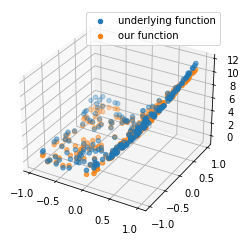

In [33]:
def torch_fit(x: np.ndarray, y: np.ndarray, model: Callable, loss: Callable, lr: float, num_epochs: int):
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        optimizer.zero_grad()
        y_pred_tensor = model(x_tensor)
        loss_value = loss(y_pred_tensor, y_true_tensor)
        print(f'Epoch {epoch}, loss {loss_value.item():.2f}')
        loss_value.backward()
        optimizer.step()

torch_fit(x_tensor, y_true_tensor, model=model, loss=loss, lr=0.1, num_epochs=30)
plot_3d(x, y_true, model(x_tensor).detach())

<div style="background:#FF6F00; padding:20px">
    <h1 align="center"> Same thing, in Tensorflow</h1>
    <img height="50" width="50" src="https://simpleicons.org/icons/tensorflow.svg" />
<div>

In [34]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Create model

In [37]:
inputs  = keras.Input(shape=(2,))
l1      = layers.Dense(10, activation='relu', name='dense_1')(inputs)
outputs = layers.Dense(1, name='regression')(l1)

model = keras.Model(inputs=inputs, outputs=outputs)
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
regression (Dense)           (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________
None


### Train

Epoch 1/10
7/7 [==============================] - 0s 3ms/step - loss: 11.0448
Epoch 2/10
7/7 [==============================] - 0s 1ms/step - loss: 1.1230
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 0.5477
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 1.0166
Epoch 5/10
7/7 [==============================] - 0s 1ms/step - loss: 0.4883
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3747
Epoch 7/10
7/7 [==============================] - 0s 2ms/step - loss: 0.3551
Epoch 8/10
7/7 [==============================] - 0s 2ms/step - loss: 0.9575
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 1.1783
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 0.2919


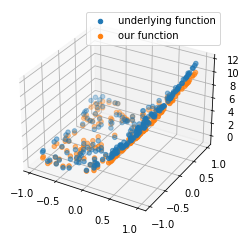

In [38]:
model.compile(loss='mse', optimizer=optimizers.SGD(0.1))
model.fit(x, y_true, epochs=10)

y_pred = model.predict(x)

plot_3d(x, y_true, model(x))